In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [35]:
sns.set_theme()

# Question and answer

## Câu hỏi: sự chênh lệch giữa giá mở cửa hôm nay và giá đóng cửa hôm trước ảnh hưởng thế nào đến khối lượng giao dịch trong ngày (100 ngày gần nhất) ?

+ Tính toán sự chêch lệch giá
+ trực quan bằng biểu đồ
+ đưa ra câu trả lời

### 1.Đọc dữ liệu

In [50]:
df=pd.read_csv('data-csv/historical_quotes.csv')
df.head()
df[80:100]

,Unnamed: 0,date,open price,high price,low price,close price,AVG price,adjusted close price,volume,value fluctuation,rate fluctuation
80,80,2022-08-05,39.90,40.00,38.00,40.00,39.50,18.17,28100,0.10,0.25
81,81,2022-08-04,39.90,41.80,39.40,39.90,40.62,18.12,87100,0.00,0.00
82,82,2022-08-03,38.00,39.90,37.60,39.90,38.71,18.12,70300,1.90,5.00
83,83,2022-08-02,37.60,38.40,37.20,38.00,37.70,17.26,99600,0.60,1.60
84,84,2022-08-01,35.60,37.50,35.60,37.40,36.79,16.99,105100,1.80,5.06
85,85,2022-07-29,35.70,36.00,35.20,35.60,35.48,16.17,38400,0.40,1.14
86,86,2022-07-28,34.60,35.60,34.40,35.20,35.11,15.99,70300,0.70,2.03
87,87,2022-07-27,34.30,34.70,34.10,34.50,34.30,15.67,15200,-0.30,-0.86
88,88,2022-07-26,34.00,35.00,33.50,34.80,34.05,15.81,19700,0.50,1.46
89,89,2022-07-25,35.10,35.10,34.00,34.30,34.20,15.58,15800,0.00,0.00


In [36]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')

reset index

In [37]:
df=df.set_axis(df['date'])
df.drop(['Unnamed: 0','date'],axis=1,inplace=True)
df

,open price,high price,low price,close price,AVG price,adjusted close price,volume,value fluctuation,rate fluctuation
date,,,,,,,,,
2022-11-29,11.5,11.5,10.3,11.5,11.23,11.50,1589500,1.0,9.52
2022-11-28,8.7,10.5,8.7,10.5,10.42,10.50,103700,0.9,9.38
2022-11-25,9.4,9.6,9.4,9.6,9.60,9.60,289900,0.8,9.09
2022-11-24,8.0,8.8,7.4,8.8,8.17,8.80,751400,0.8,10.00
2022-11-23,8.4,8.8,8.0,8.0,8.30,8.00,642500,-0.4,-4.76
...,...,...,...,...,...,...,...,...,...
2009-11-02,9.5,9.5,9.2,9.5,9.47,4.15,10300,-0.2,-2.06
2009-10-30,11.0,11.7,9.7,9.7,10.23,4.24,29410,-0.8,-7.62
2009-10-29,11.0,11.0,10.5,10.5,10.70,4.59,6100,1.1,11.70


### 2. tính toán sự chênh lệch

Lấy giá cổ phiếu mở cửa trong 100 ngày gần nhất

In [38]:
df_open=df['open price'][0:100]

Lấy giá đóng cửa của từ ngày 2 đến ngày 101 

In [39]:
df_close=df['close price'][1:101]

Lấy giá mở cửa trừ giá đóng cửa

In [40]:
diff=df_open.values-df_close.values
diff=pd.Series(data=diff,index=df_open.index)

Lấy cột volume

In [45]:
volume=df['volume'][0:100]

### 3. Trực quan 

Text(0.5, 1.0, 'Khối lượng giao dịch')

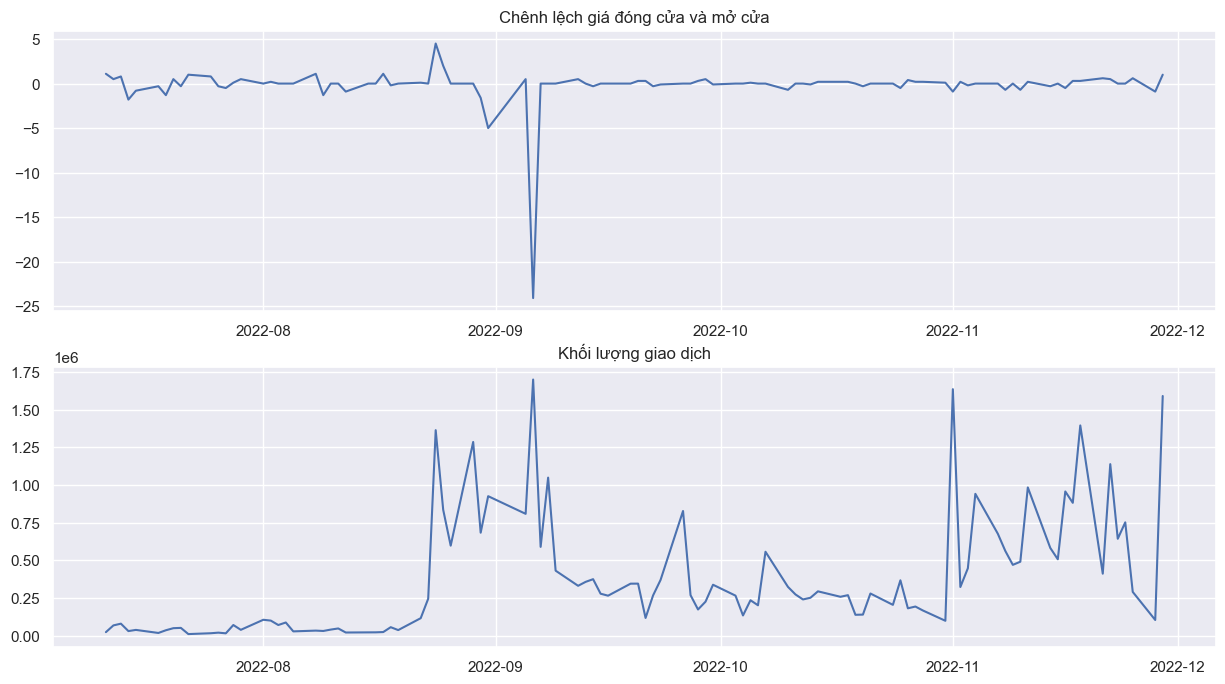

In [49]:
fig,ax=plt.subplots(nrows=2,
                    ncols=1,
                    figsize=(15,8))
ax[0].plot(diff)
ax[1].plot(volume)
ax[0].set_title("Chênh lệch giá đóng cửa và mở cửa")
ax[1].set_title("Khối lượng giao dịch")

### 3. Trả lời câu hỏi

Nhìn vào biểu đồ ta có thể thấy giai đoạn tháng 8 thì giá cổ phiếu ổn định giao động không nhiều nên khối lượng giao dịch rất ít có vẻ như thị trường đang dần không quan tâm đến nữa nhưng trong giai đoạn từ tháng 9 trở đi thì lượng giao dịch lớn hơn rất nhiều nguyên nhân là do công ty có sự phân tách cổ phiếu nên nhìn vào biểu đồ một ta thấy một đáy rất sâu còn nhìn vào biểu đồ 2 thì ta thấy có 3 đỉnh rất nhọn 
+ Một là đầu tháng 9
+ hai là đoạn tháng 11 vì khi nhìn vào biểu độ một ta thấy giá cổ phiếu đi xuống mạnh vì tâm lý bắt đáy hoặc cắt lỗ nên lượng giao dịch rất lớn
+ Ba là những ngày gần cuối thì khi giá cổ phiếu xuống thì nó bắt đầu tăng mạnh tạo một đáy mới nên lượng giao dịch hôm đó tăng đột biến